X shape: (23, 35)
Xprime raw shape: (23, 36)
X aligned: (23, 35) Xprime aligned: (23, 35)
r = 1 (energia ~ 1.000000)
A shape: (23, 23)
rel error (DMD-SVD): 2.161560417874311e-07
rel error (pinv): 6.91576065215163e-11


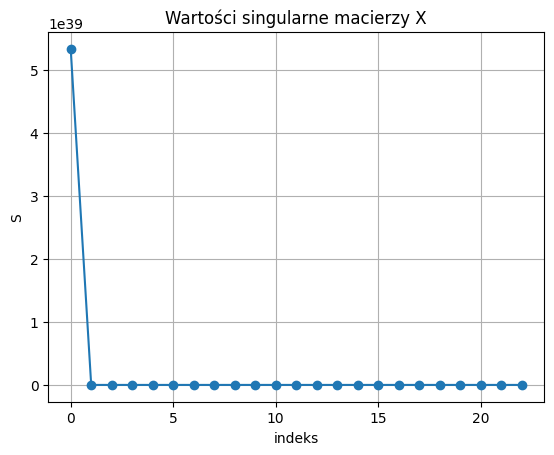

Zapisano: War2_A_DMD.csv oraz War2_A_PINV.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_PATH  = "War2_X.csv"
XP_PATH = "War2_Xprime.csv"

def read_semicolon_decimalcomma(path):
    df = pd.read_csv(path, sep=";", header=None, engine="python")
    for c in df.columns:
        df[c] = df[c].map(lambda v: float(str(v).strip().replace(",", ".")))
    return df


dfX  = read_semicolon_decimalcomma(X_PATH)
dfXp = read_semicolon_decimalcomma(XP_PATH)

if (dfX.iloc[:,0].dropna().astype(int).values == np.arange(1, len(dfX)+1)).all():
    dfX = dfX.iloc[:, 1:]

X  = dfX.to_numpy(dtype=float)
Xp = dfXp.to_numpy(dtype=float)

print("X shape:", X.shape)
print("Xprime raw shape:", Xp.shape)

n, m = X.shape

if Xp.shape[0] == n and Xp.shape[1] == m + 1 and np.allclose(Xp[:, :m], X):
    Xp = Xp[:, 1:]
m2 = min(X.shape[1], Xp.shape[1])
X  = X[:, :m2]
Xp = Xp[:, :m2]

print("X aligned:", X.shape, "Xprime aligned:", Xp.shape)

U, S, Vt = np.linalg.svd(X, full_matrices=False)

energy = np.cumsum(S**2) / np.sum(S**2)
r = int(np.searchsorted(energy, 0.99) + 1)  # 99% energii
r = min(r, len(S))

Ur = U[:, :r]
Sr = S[:r]
Vtr = Vt[:r, :]

A = Xp @ Vtr.T @ np.diag(1.0 / Sr) @ Ur.T

A_pinv = Xp @ np.linalg.pinv(X)

rel_err = np.linalg.norm(Xp - A @ X, "fro") / np.linalg.norm(Xp, "fro")
rel_err_pinv = np.linalg.norm(Xp - A_pinv @ X, "fro") / np.linalg.norm(Xp, "fro")

print(f"r = {r} (energia ~ {energy[r-1]:.6f})")
print("A shape:", A.shape)
print("rel error (DMD-SVD):", rel_err)
print("rel error (pinv):", rel_err_pinv)

plt.figure()
plt.plot(S, marker="o")
plt.title("Wartości singularne macierzy X")
plt.xlabel("indeks")
plt.ylabel("S")
plt.grid(True)
plt.show()

pd.DataFrame(A).to_csv("War2_A_DMD.csv", index=False, header=False)
pd.DataFrame(A_pinv).to_csv("War2_A_PINV.csv", index=False, header=False)
print("Zapisano: War2_A_DMD.csv oraz War2_A_PINV.csv")
